In [1]:
# Himalaya Database

- Radar diagram para número de expedicioes por estación (primaavera, otoño...) a lo largo de los años. 

- Network diagram para enlazar expediciones. 

- Flow map para mostrar nacionalidades de las expediciones. ¿Tiene sentido?

The Himalayan Database is a compilation of records for all expeditions that have
climbed in the Nepalese Himalaya. The database is based on the expedition
archives of Elizabeth Hawley, a longtime journalist based in Kathmandu, and it
is supplemented by information gathered from books, alpine journals, and
correspondence with Himalayan climbers.
The original data covered all expeditions from 1905 through 2003 to more than
300 significant Nepalese peaks. Also included were expeditions to both sides of
border peaks such as Everest, Cho Oyu, Makalu, and Kangchenjunga as well as
to some smaller border peaks. Data on expeditions to trekking peaks were
limited to early attempts, first ascents, and major accidents.


- The Peaks table describes the mountaineering peaks of Nepal, one record for
each peak. There are more than 465 records in this table.
- The Exped table describes each of the climbing expeditions. There are more
than 10,500 records in this table.
- The Members table describes each of the members on the climbing team and
hired personnel who were significantly involved in the expedition. There are
more than 77,900 records in this table.
- The Refer table describes the literature references for each expedition,
primarily major books and journal and magazine articles. There are more than
14,600 records in this table.

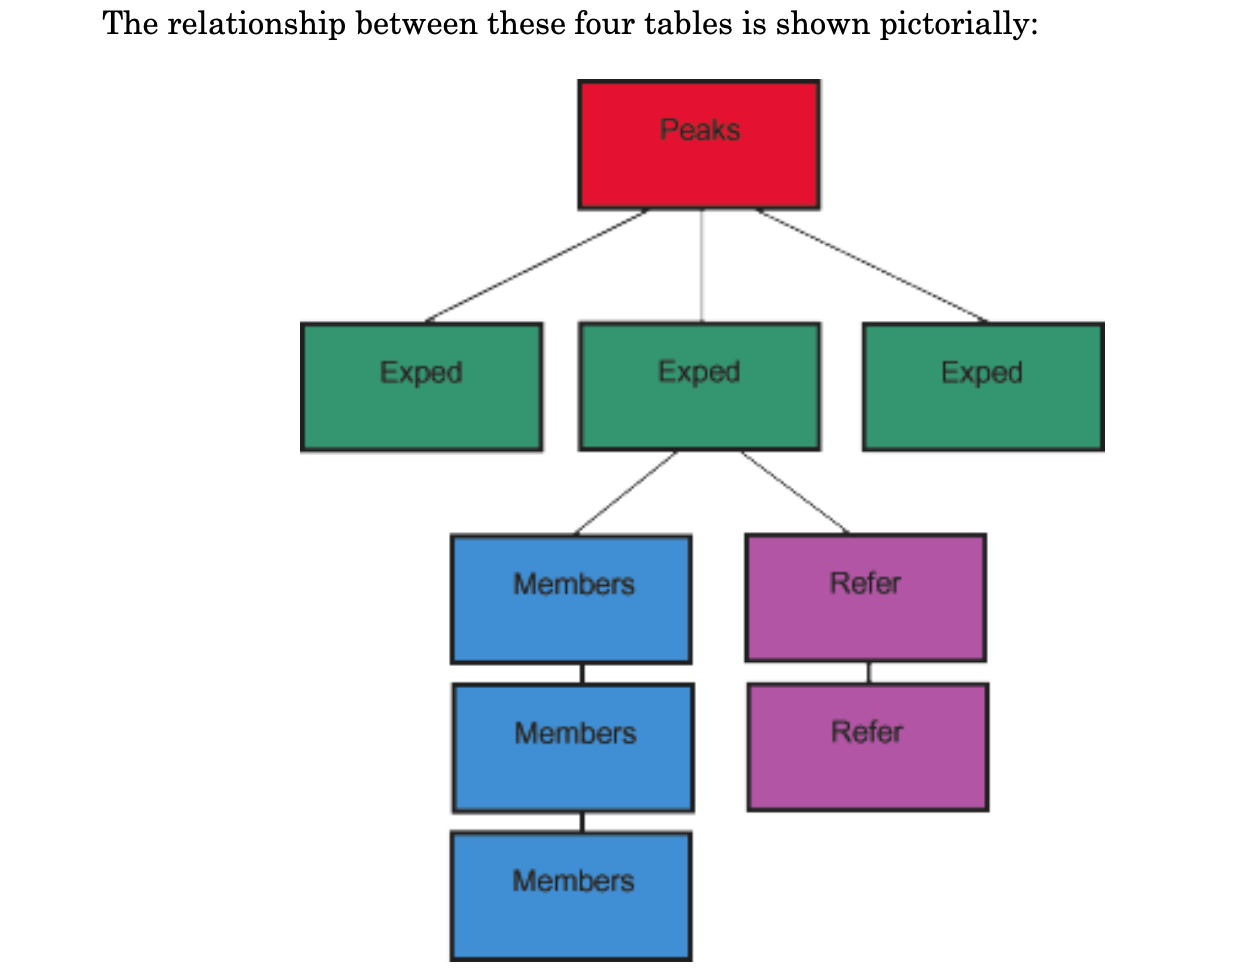

In [2]:
from IPython.display import Image
Image(filename = "data_model.png", width = 600, height = 300)

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Data from Kaggle
peaks = pd.read_excel('peaks.xlsx')
exped = pd.read_excel('exped.xlsx')
#members = pd.read_excel('members.xlsx')
#refer = pd.read_excel('refer.xlsx')

In [72]:
#members.columns  # fact table

In [73]:
#refer.columns

# Peaks

Pages 50-59 https://www.himalayandatabase.com/downloads/Himalayan%20Database%20Guide.pdf

In [74]:
peaks.columns

Index(['PEAKID', 'PKNAME', 'PKNAME2', 'LOCATION', 'HEIGHTM', 'HEIGHTF',
       'HIMAL', 'REGION', 'OPEN', 'UNLISTED', 'TREKKING', 'TREKYEAR',
       'RESTRICT', 'PHOST', 'PSTATUS', 'PEAKMEMO', 'PYEAR', 'PSEASON',
       'PEXPID', 'PSMTDATE', 'PCOUNTRY', 'PSUMMITERS', 'PSMTNOTE', 'REFERMEMO',
       'PHOTOMEMO'],
      dtype='object')

In [116]:
# Filter 8000 m peaks
peaks = peaks[peaks['HEIGHTM'] >= 8000]

In [117]:
#Drop useless columns
peaks = peaks[['PEAKID', 'PKNAME','LOCATION', 'HEIGHTM']]

In [126]:
peaks.dtypes

PEAKID      object
PKNAME      object
LOCATION    object
HEIGHTM      int64
dtype: object

In [139]:
peaks['PEAKID'] = peaks['PEAKID'].astype("string")
peaks['PKNAME'] = peaks['PKNAME'].astype("string")
peaks['LOCATION'] = peaks['LOCATION'].astype("string")
peaks.dtypes

PEAKID      string
PKNAME      string
LOCATION    string
HEIGHTM      int64
dtype: object

In [140]:
peaks_8000m = list(peaks['PEAKID'])

# Expeditions

Page 60 https://www.himalayandatabase.com/downloads/Himalayan%20Database%20Guide.pdf

A 9-character ID identifies all expeditions and is given in the form

pppp-yys-nn

where “pppp” is the peak ID, “yy” is the last two digits of the year, “s” is the
season, and “nn” is the expedition number. The seasons are numbered as
1=spring, 2=summer, 3=autumn, and 4=winter. 

For example, ANN1-701-01 is the expedition ID for Chris Bonington’s Annapurna South Face expedition in
the spring of 1970 
and EVER-843-05 is the very controversial Dutch Everest expedition in autumn of 1984 (there were
a total of six expeditions to Everest that season).

In [141]:
exped = exped[exped['PEAKID'].isin(peaks_8000m)]

In [145]:
exped['PEAKID'] = exped['PEAKID'].astype("string")

In [149]:
exped = exped.merge(peaks, on='PEAKID', how='left')

In [150]:
exped.drop(['COUNTRIES','APPROACH','BCDATE','SMTTIME','TERMDATE','TRAVERSE','SKI','PARAPENTE', 'CAMPS', 'ROPE', 'SMTHIRED', 'SMTHIRED','OTHERSMTS','CAMPSITES','ROUTEMEMO', 'PRIMRTE','PRIMMEM','PRIMREF','PRIMID', 'CHKSUM'], axis=1, inplace=True)

In [151]:
exped.columns

Index(['EXPID', 'PEAKID', 'YEAR', 'SEASON', 'HOST', 'ROUTE1', 'ROUTE2',
       'ROUTE3', 'ROUTE4', 'NATION', 'LEADERS', 'SPONSOR', 'SUCCESS1',
       'SUCCESS2', 'SUCCESS3', 'SUCCESS4', 'ASCENT1', 'ASCENT2', 'ASCENT3',
       'ASCENT4', 'CLAIMED', 'DISPUTED', 'SMTDATE', 'SMTDAYS', 'TOTDAYS',
       'TERMREASON', 'TERMNOTE', 'HIGHPOINT', 'TOTMEMBERS', 'SMTMEMBERS',
       'MDEATHS', 'TOTHIRED', 'HDEATHS', 'NOHIRED', 'O2USED', 'O2NONE',
       'O2CLIMB', 'O2DESCENT', 'O2SLEEP', 'O2MEDICAL', 'O2TAKEN', 'O2UNKWN',
       'ACCIDENTS', 'ACHIEVMENT', 'AGENCY', 'COMRTE', 'STDRTE', 'PKNAME',
       'LOCATION', 'HEIGHTM'],
      dtype='object')

In [82]:
#n_exped_by_peak = exped[['PEAKID','EXPID']].groupby(by='PEAKID',as_index=False).count()
#n_exped_by_peak.rename(columns = {'EXPID': 'NEXPED'}, inplace = True)

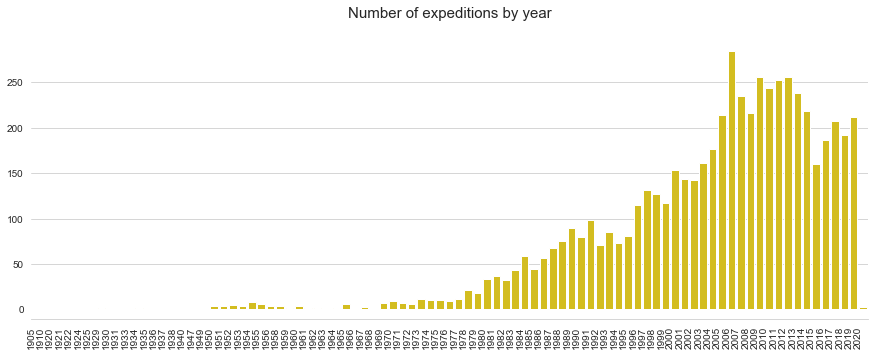

In [222]:
sns.set_style("whitegrid")
f = plt.figure(figsize = (15, 5))
sns.countplot(x = exped['YEAR'], data = exped, color = '#F1D302')
sns.despine(left = True, offset = 10);
plt.title("Number of expeditions by year", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.xticks(rotation = 90, ha = 'right')
plt.show()

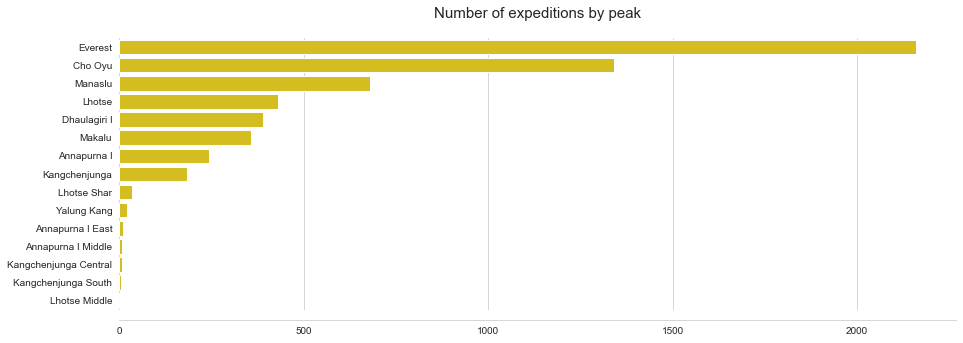

In [223]:
sns.set_style("whitegrid")
f = plt.figure(figsize = (15, 5))
sns.countplot(y = exped['PKNAME'], data = exped, color = '#F1D302', \
                   order = exped['PKNAME'].value_counts().index)
sns.despine(left = True, offset = 10);
plt.title("Number of expeditions by peak", pad = 20, fontsize=15)
plt.ylabel("")
plt.xlabel("")
plt.show()